In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('gurgaon_properties_cleaned_v2_updated.csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,servant room,others,furnishing_type,luxury_score
0,flat,indiabulls centrum park,sector 103,2.20,7652.0,2875.0,Super Built up area 2875(267.1 sq.m.),4,6,3+,4.0,North-East,Relatively New,2875.0,NaN,NaN,0,0,0,1,0,2,108
1,flat,adani brahma samsara vilasa,sector 63,3.25,29545.0,1100.0,Built Up area: 2700 (250.84 sq.m.)Carpet area:...,3,3,3,4.0,North-East,New Property,NaN,2700.0,1100.0,0,0,0,0,1,0,41
2,flat,tulip monsella,sector 53,7.40,33198.0,2229.0,Carpet area: 2229 (207.08 sq.m.),4,4,3,21.0,NaN,Under Construction,NaN,NaN,2229.0,0,0,0,0,0,0,35
3,flat,raheja vedaanta,sector 108,1.00,4854.0,2060.0,Built Up area: 2060 (191.38 sq.m.)Carpet area:...,2,2,2,0.0,North,Undefined,NaN,2060.0,1890.0,0,0,0,0,0,0,0
4,flat,smart world orchard,sector 61,2.41,14785.0,1630.0,Built Up area: 1630 (151.43 sq.m.)Carpet area:...,3,3,3,2.0,East,New Property,NaN,1630.0,1625.0,0,0,0,0,0,0,61


# property_type vs price

<AxesSubplot:xlabel='property_type', ylabel='price'>

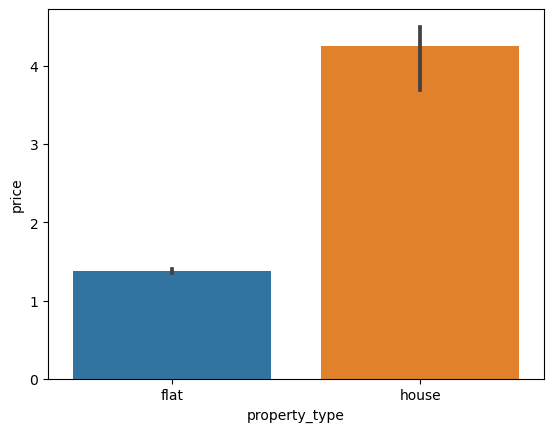

In [4]:
sns.barplot(x=df['property_type'],y=df['price'],estimator=np.median)

- Here we observe that median price of a house around 4 crore.
- Median price of a flat is around 1.5 crores

<AxesSubplot:xlabel='property_type', ylabel='price'>

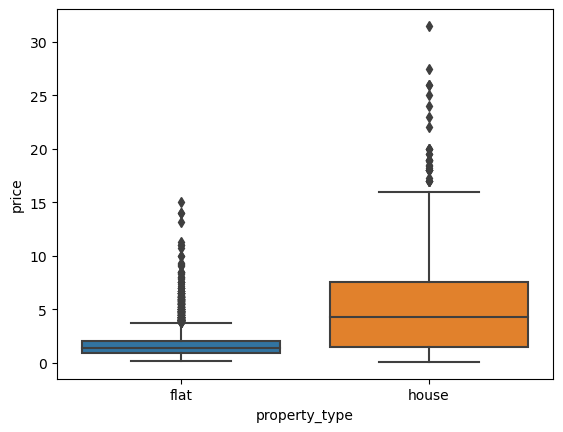

In [5]:
sns.boxplot(x=df['property_type'],y=df['price'])

- Here We observe that range of the price of Houses(0-15 crores) are much greater than flats(0-5 crores).
- Thare are also have much more potential outliers for both flats and houses

# property_type vs price_per_sqft

<AxesSubplot:xlabel='property_type', ylabel='price_per_sqft'>

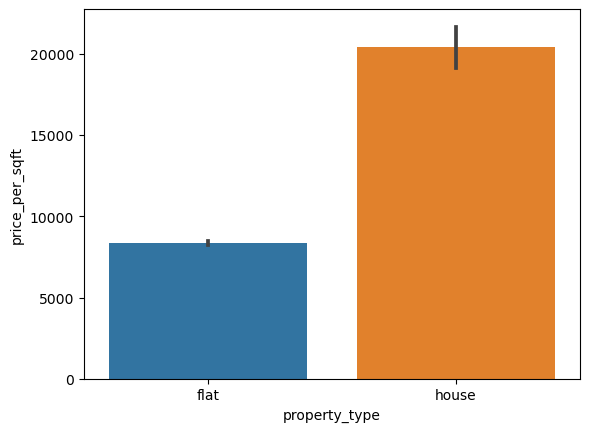

In [6]:
sns.barplot(x=df['property_type'],y=df['price_per_sqft'],estimator=np.median)

- Here we observe that median price/sq.ft of houses around Rs.20000 which is quite a big number
- Here we observe that median price/sq.ft of flats around Rs.8000 , this is quite fine

<AxesSubplot:xlabel='property_type', ylabel='price_per_sqft'>

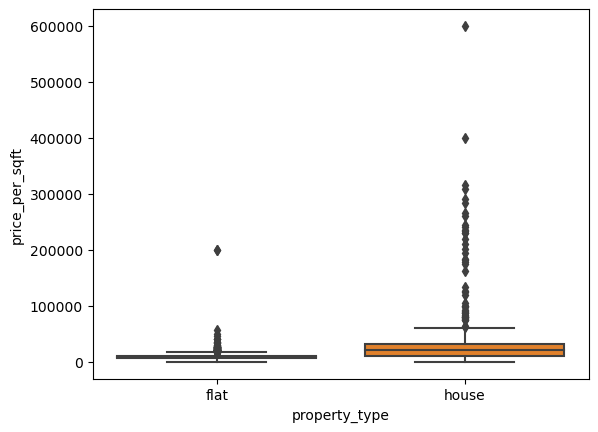

In [7]:
sns.boxplot(x=df['property_type'],y=df['price_per_sqft'])

- Here we observe lot of outliers presents in both flats as well as houses 
- We need to deal with this outlier

<AxesSubplot:xlabel='bedRoom', ylabel='property_type'>

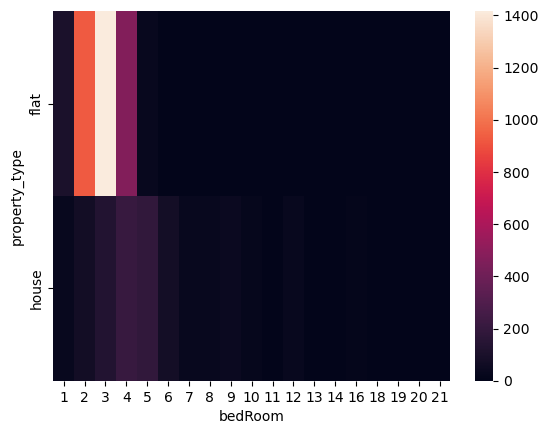

In [8]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))

- Here we observe that in flats there are most common 2 bhk,3bhk,4bhk flats are available

In [9]:
# Chcecking Outliers
df[df['bedRoom']>=10].shape

(72, 23)

- Here we see that 72 property types whose No of bedrooms are greater than 10 which is very uncommon 

# property_type vs price_per_sqft

In [10]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,servant room,others,furnishing_type,luxury_score
706,house,independent,sector 54,5.5,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,0,0,1,0,1,70
446,flat,ansal heights,sector 86,1.3,4666.0,2786.0,Super Built up area 2786(258.83 sq.m.),4,6,2,11.0,East,New Property,2786.0,NaN,NaN,0,0,0,1,1,0,86
2886,house,independent,new sector 2,1.0,8796.0,1137.0,Plot area 120(100.34 sq.m.)Built Up area: 120 ...,3,2,2,1.0,North,Old Property,NaN,120.0,100.0,0,1,0,0,0,0,0
2242,house,independent,sector 105,1.1,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0
2286,flat,mm merlin,sector 67,3.4,14418.0,2358.0,Super Built up area 2358(219.07 sq.m.),3,4,3,17.0,North,Relatively New,2358.0,NaN,NaN,0,0,0,1,0,2,174


<AxesSubplot:xlabel='property_type', ylabel='floorNum'>

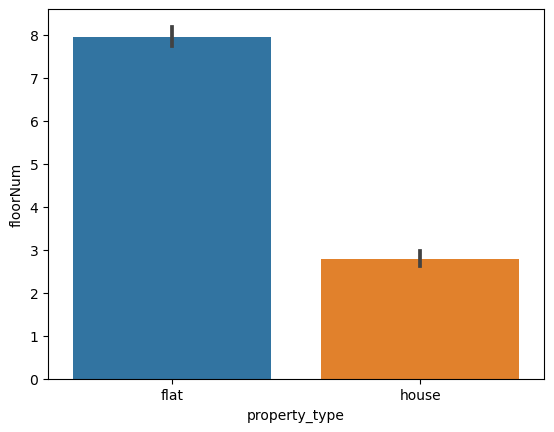

In [11]:
sns.barplot(x=df['property_type'],y=df['floorNum'])

- Here we observe that average height of flats are lying in 8 floors
- Average height of house are raltive low which is quite expected and average heights of house is 3 floor

<AxesSubplot:xlabel='property_type', ylabel='floorNum'>

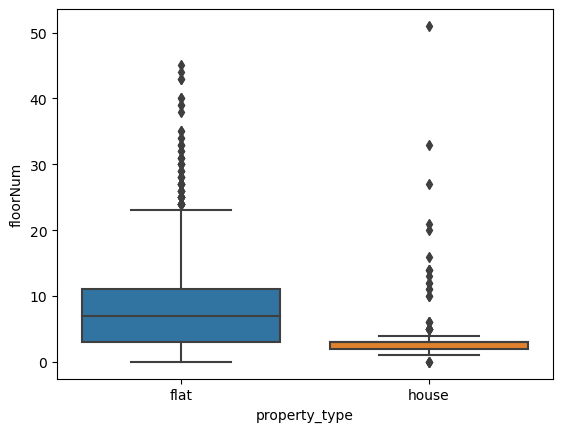

In [12]:
sns.boxplot(x=df['property_type'],y=df['floorNum'])

- Here we observe that there is one house which is staying in 50th floor.
- So we further that those houses which have heights are greater 10 ( Check those Outliers)

In [13]:
# Checking outliers
df[(df['property_type']=='house')&(df['floorNum']>10)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,servant room,others,furnishing_type,luxury_score
398,house,spaze privy,sector 72,3.09,6981.0,4426.0,Built Up area: 3653 (339.37 sq.m.)Carpet area:...,5,5,3+,14.0,East,Relatively New,NaN,3653.0,2922.0,0,0,0,1,0,2,33
781,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,13.0,NaN,Undefined,NaN,2360.0,NaN,0,0,0,0,0,0,0
904,house,ats tourmaline,sector 109,1.87,8697.0,2150.0,Built Up area: 2150 (199.74 sq.m.),3,4,0,12.0,NaN,Undefined,NaN,2150.0,NaN,0,0,0,0,0,0,0
1535,house,suncity township,sector 54,2.00,30968.0,646.0,Plot area 60Built Up area: 60 sq.m.Carpet area...,9,9,3,11.0,North,Relatively New,NaN,60.0,59.0,0,0,0,1,0,1,7
1631,house,ninex city,sector 76,1.75,6250.0,2800.0,Carpet area: 2800 (260.13 sq.m.),4,4,0,14.0,NaN,Undefined,NaN,NaN,2800.0,0,0,0,0,0,0,0
1732,house,spaze privy,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5,5,3+,21.0,NaN,Relatively New,NaN,3653.0,NaN,0,0,0,0,0,0,0
1889,house,greenopolis,sector 89,0.70,5397.0,1297.0,Built Up area: 1297 (120.5 sq.m.),2,2,2,14.0,North-East,Undefined,NaN,1297.0,NaN,0,0,0,0,0,0,0
1928,house,indiabulls centrum park,sector 103,3.25,8125.0,4000.0,Plot area 4000(371.61 sq.m.),4,3,3+,20.0,NaN,Under Construction,NaN,4000.0,NaN,0,0,0,0,0,0,51
2252,house,suncity avenue,sector 76,0.75,10067.0,745.0,Plot area 745(69.21 sq.m.)Built Up area: 745 s...,2,2,2,11.0,North-East,New Property,NaN,745.0,NaN,0,0,0,0,0,0,40
2412,house,satya the hermitage,sector 103,3.15,6702.0,4700.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,12.0,East,Undefined,NaN,4700.0,NaN,0,0,0,0,0,0,61


- Conclusions houses(villa) but apartment 

<AxesSubplot:xlabel='agePossession', ylabel='property_type'>

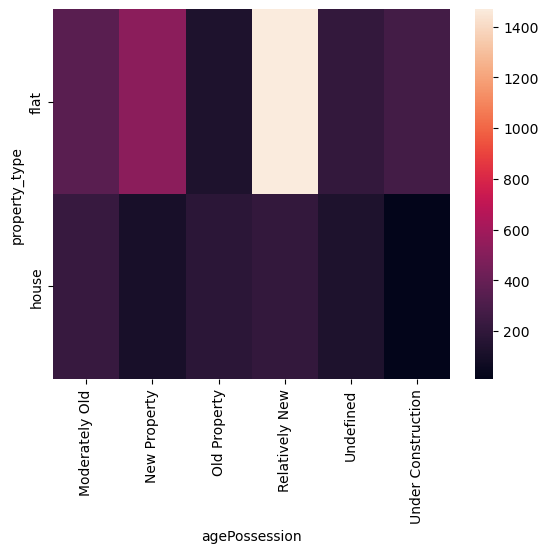

In [14]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))

- Here we observe that there are more number of new flats are available 
- But in case of House there are mostly old properties are presents.

<AxesSubplot:xlabel='agePossession', ylabel='property_type'>

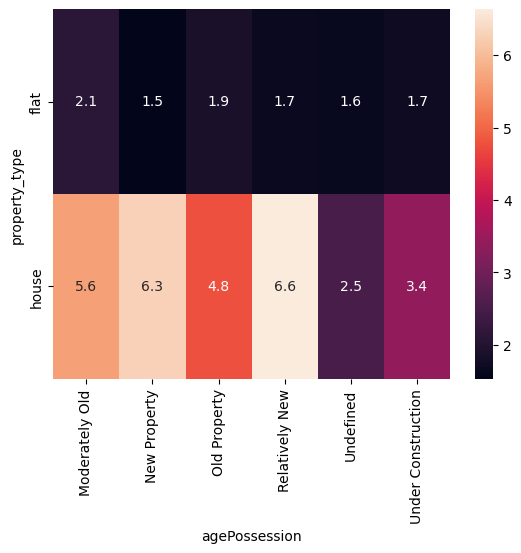

In [15]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='agePossession',values='price',aggfunc='mean'),annot=True)

- Here we observe that there are budget flats are available 
- In case of houses the prices of new property are comparatively higher( 6.3 crores , 6.6 crores) than the older property and 
    under construction properties

<AxesSubplot:xlabel='bedRoom', ylabel='property_type'>

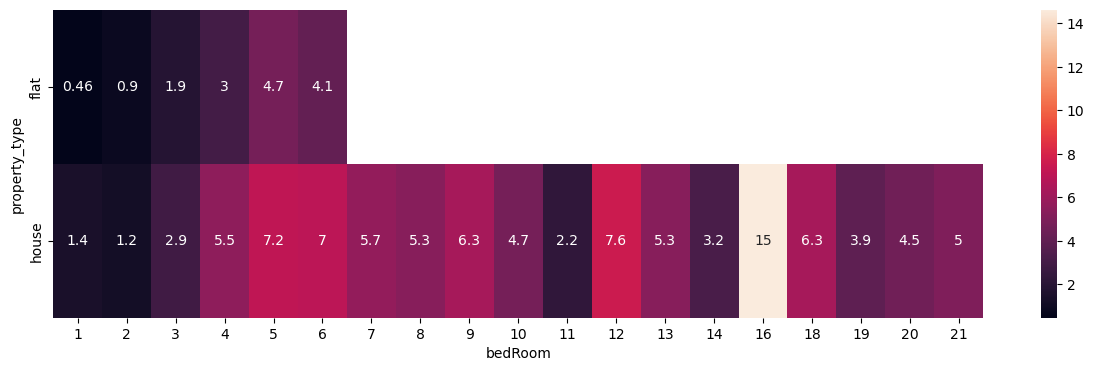

In [16]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)

- Here we observe that price of the flats become higher when no. of bedrooms get increased
- In similar way we see that price of house are become higher when no. of bedrooms get increased

<AxesSubplot:xlabel='furnishing_type', ylabel='property_type'>

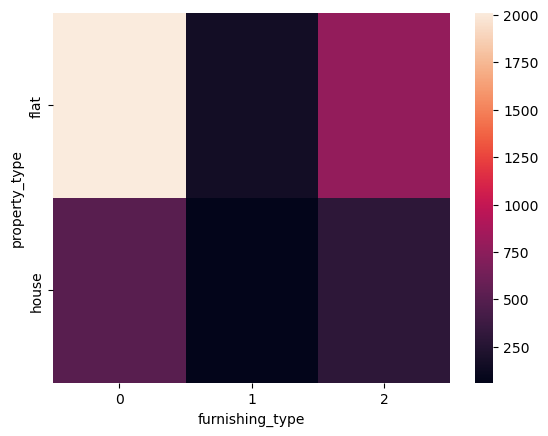

In [17]:
sns.heatmap(pd.crosstab(df['property_type'],df['furnishing_type']))

- Here we observe there are more number of flats available of unfurnished type

<AxesSubplot:xlabel='furnishing_type', ylabel='property_type'>

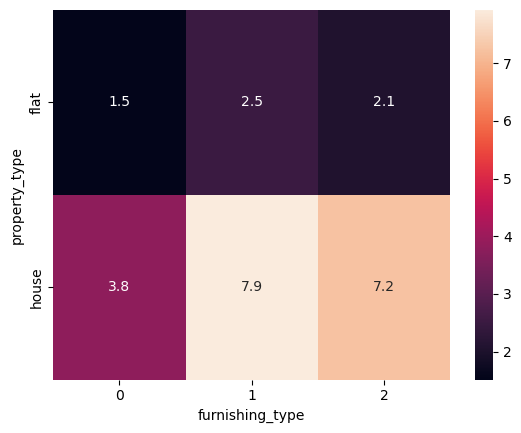

In [18]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)

- Price of semi furnished and furnished House relatively larger than unfurnished House
- Price of all types of flats are mostly in the same range

<AxesSubplot:xlabel='property_type', ylabel='luxury_score'>

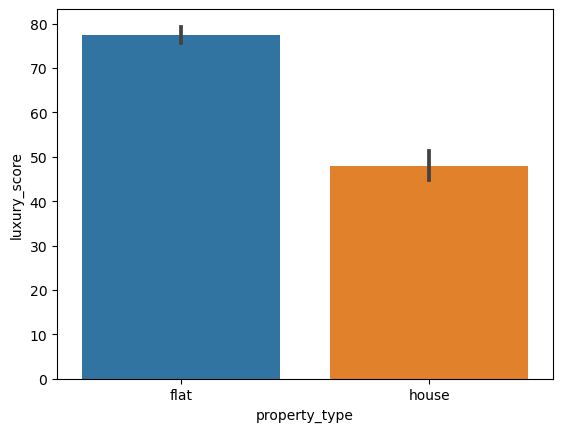

In [19]:
sns.barplot(x=df['property_type'],y=df['luxury_score'])

- Here it is clearly seen that luxury score are comparatively higher than house

<AxesSubplot:xlabel='property_type', ylabel='luxury_score'>

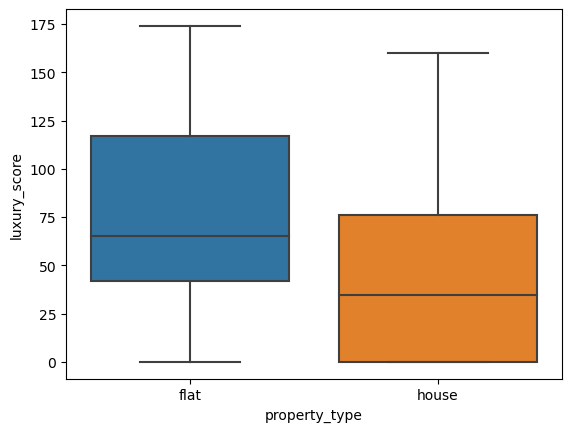

In [20]:
sns.boxplot(x=df['property_type'],y=df['luxury_score'])

- There are no outliers in the dstribution

<AxesSubplot:xlabel='sector', ylabel='property_type'>

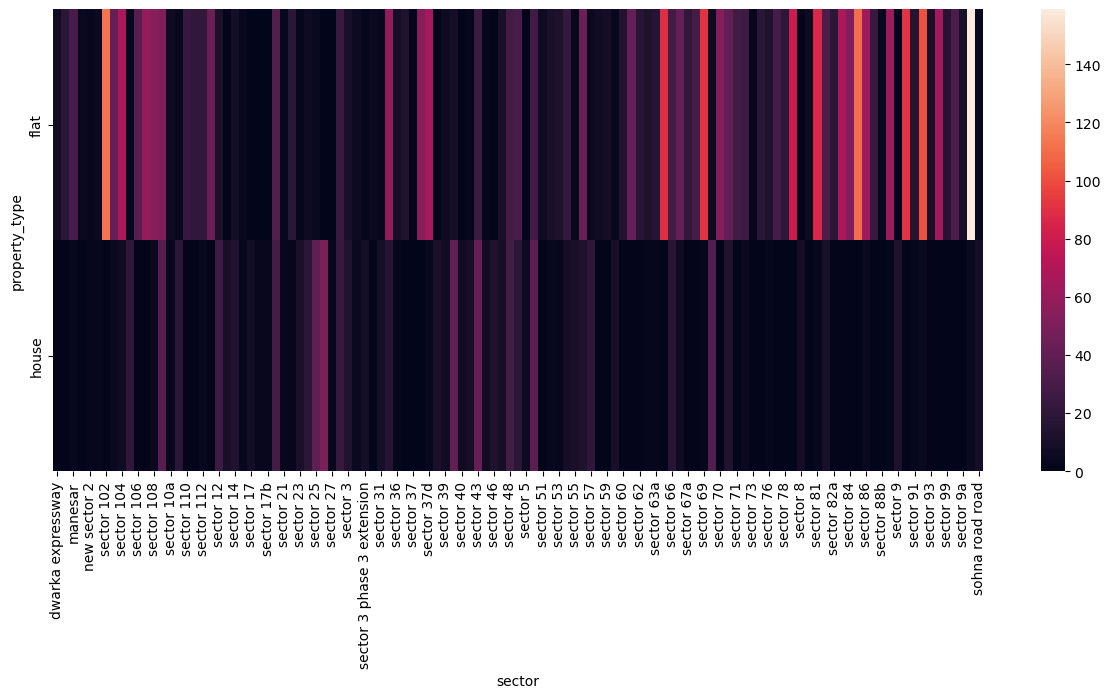

In [23]:
# sector analysis
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['property_type'],df['sector'].sort_index()))

- Here it is observed that those which are relatively new secotor from sector 70 onwards there are more flats are available
- In case of House there are more number of houses within sector 60

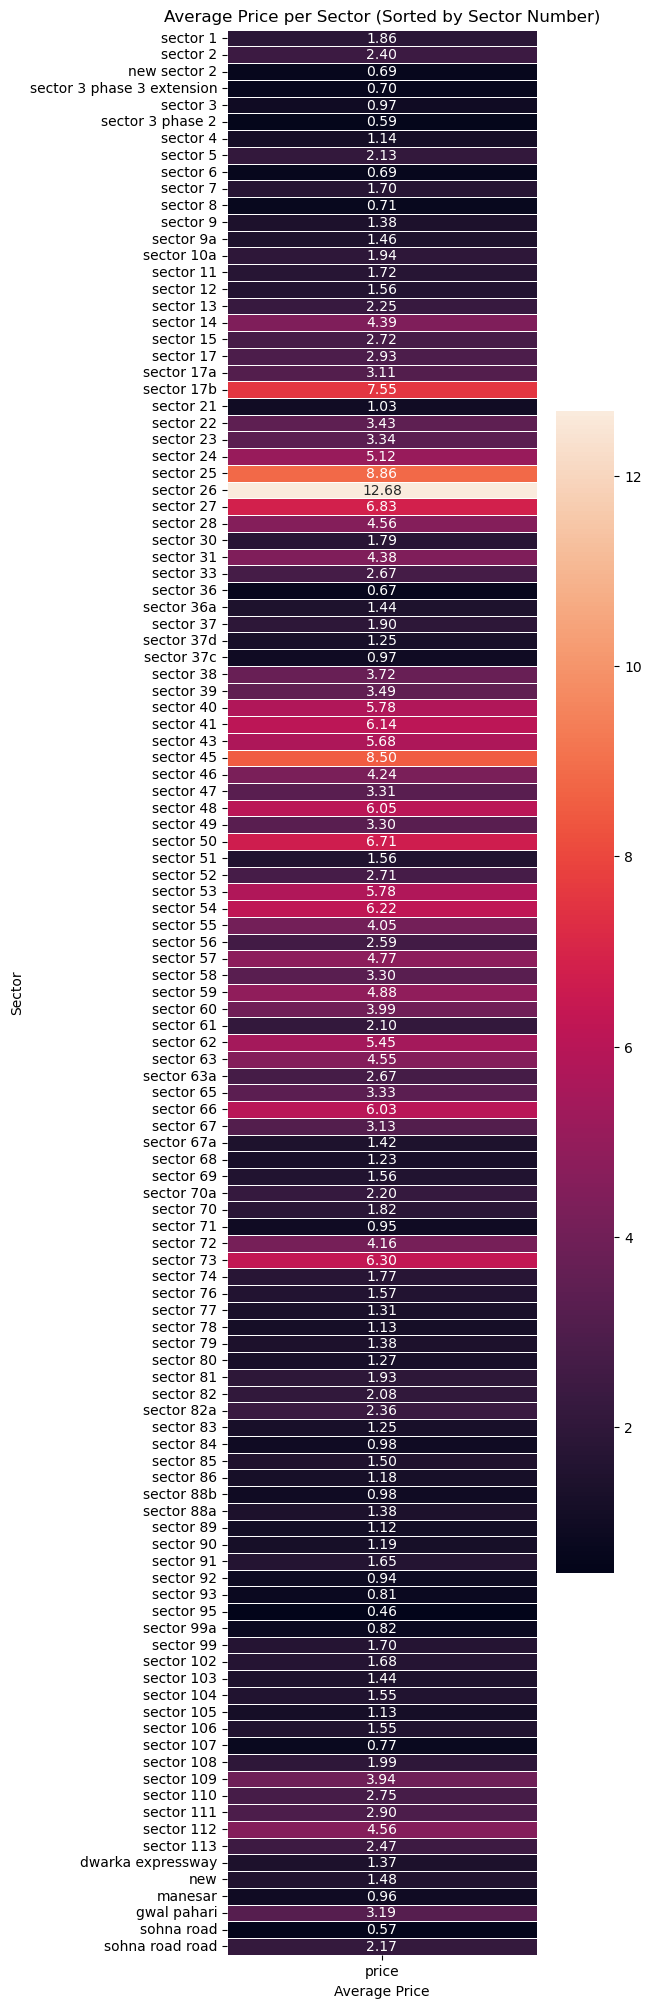

In [32]:
import re
# Group by 'sector' and calculate the average price
avg_price_per_sector =df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector number
def extract_sector_number(sector_name):
    match=re.search(r'\d+',sector_name)
    
    if match:
        return int(match.group())
    else:
        return float('inf')

avg_price_per_sector['sector_number']=avg_price_per_sector['sector'].apply(extract_sector_number)

# sort by sector number
avg_price_per_sector_sorted_by_sector=avg_price_per_sector.sort_values(by='sector_number')

plt.figure(figsize=(5,25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']],annot=True,fmt=".2f",linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

- Here we observe that average price of property is the highest in sector 26
- average price of property in sectors 25,27,45 are costly
- Similarly the average price for the new sectors from sector 100 onwards price are comparatively cheaper than other sectors

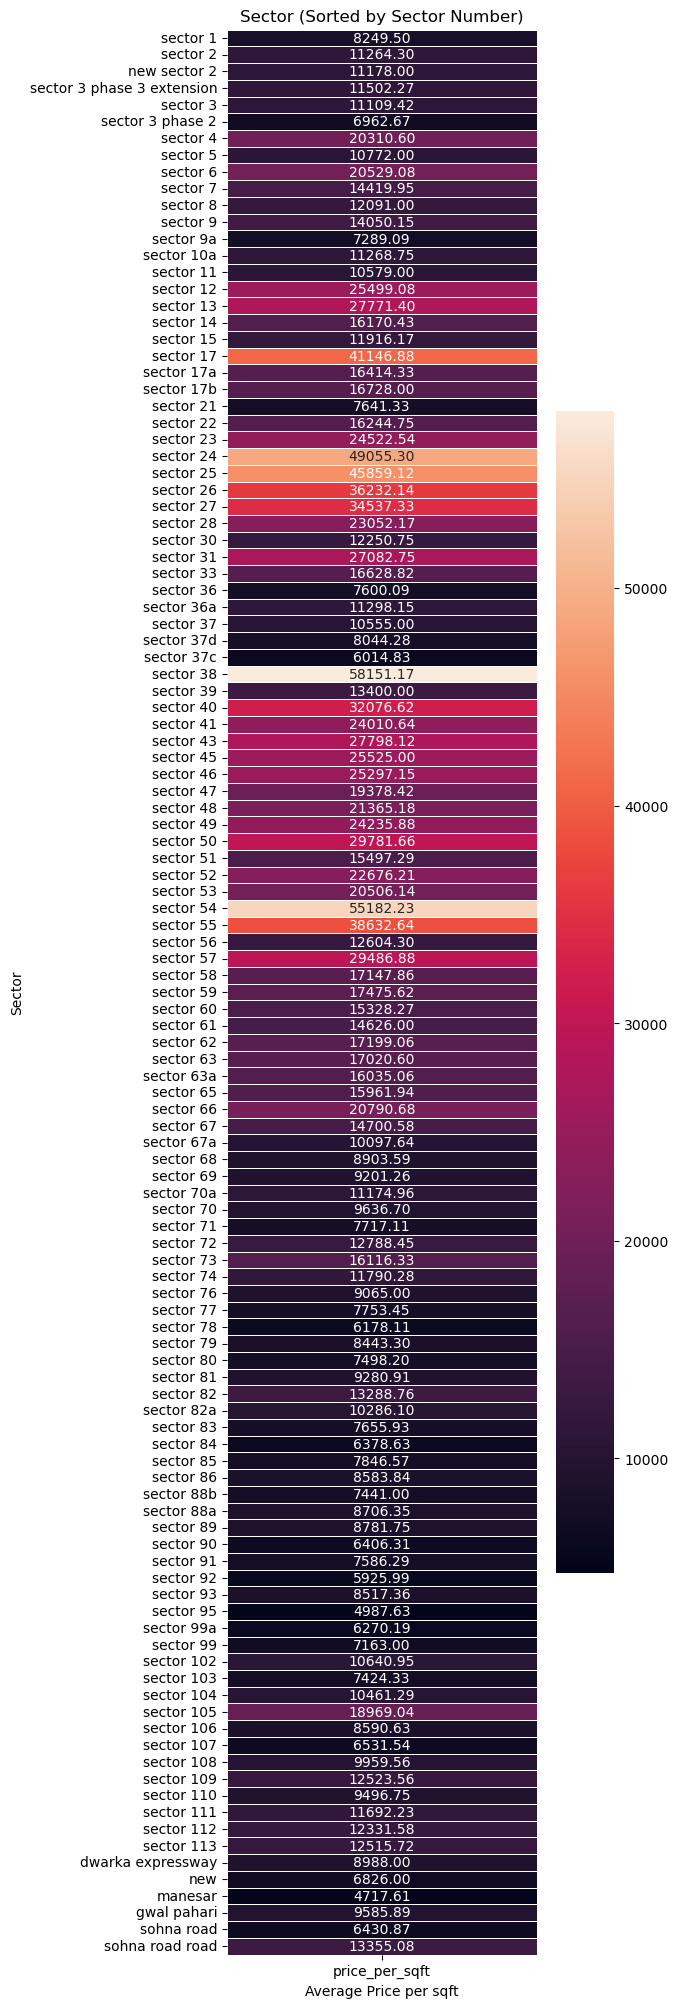

In [33]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

- Here it is seen that price per sq.ft is relatively larger in the sectors 24,26,38 (middle sectors)
- price per sq.ft is the largest in sector 54
- Relatively in new sectors from sector 100 onwards price per sq.ft is become less than other sectors

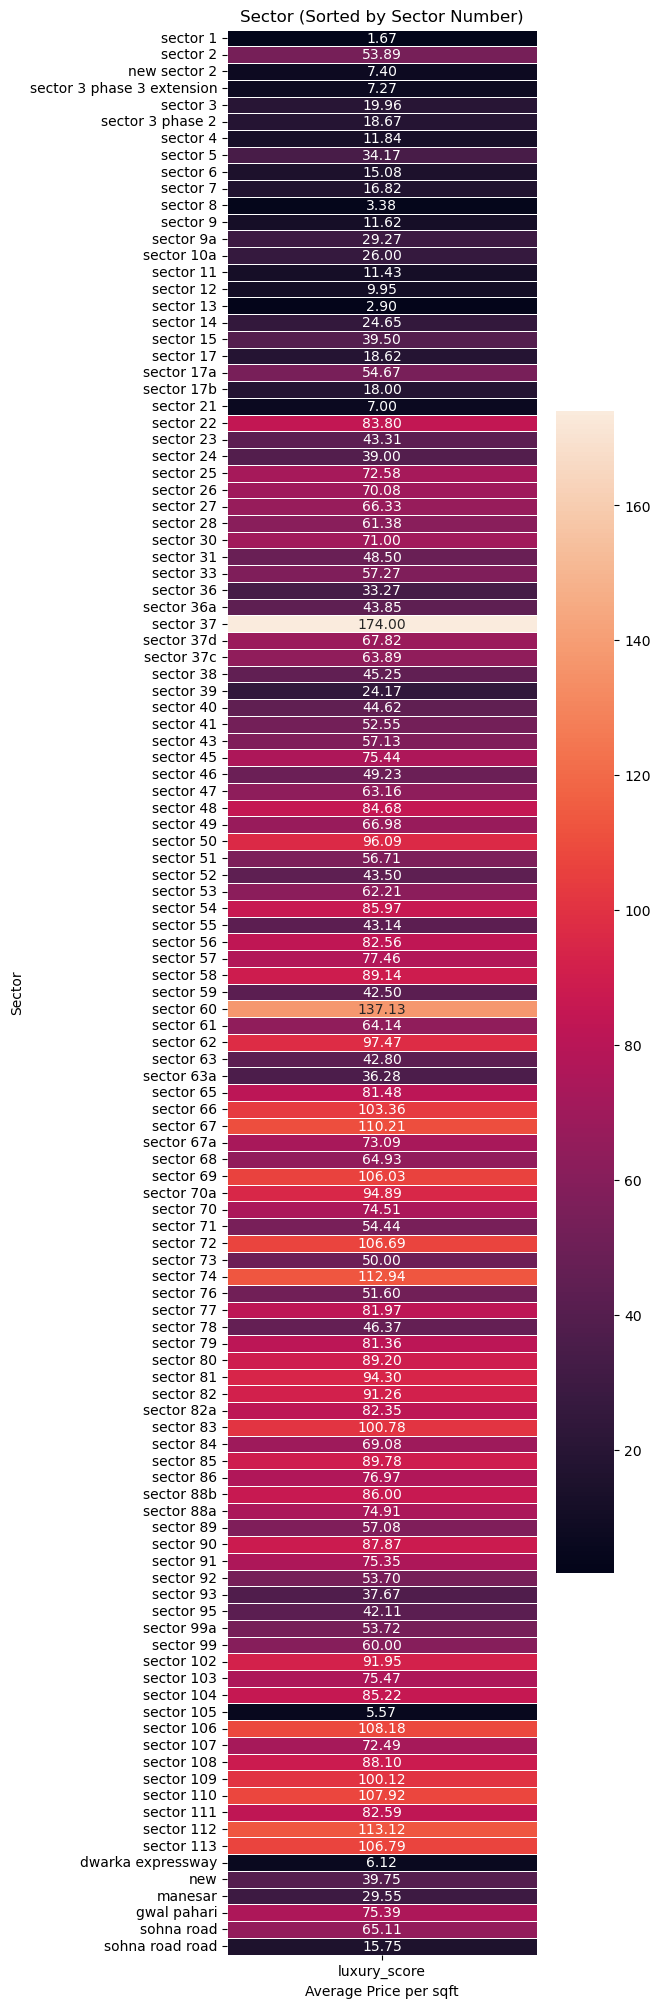

In [34]:
luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

# Sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_score']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

## price

C:\Users\Lenovo\AppData\Local\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area', ylabel='price'>

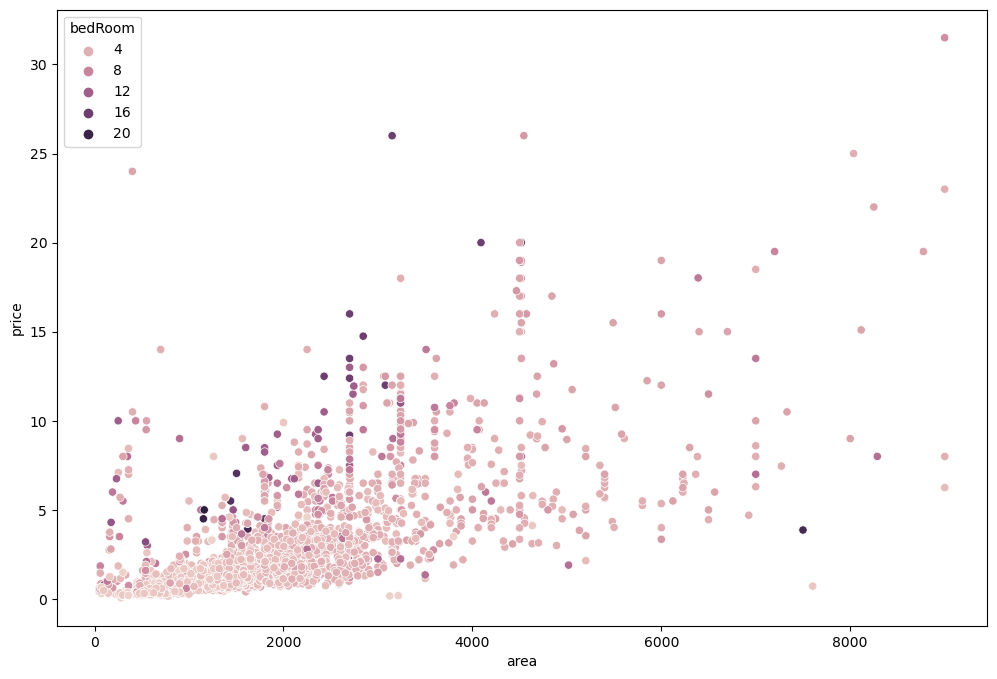

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(df[df['area']<10000]['area'],df['price'],hue=df['bedRoom'])

C:\Users\Lenovo\AppData\Local\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area', ylabel='price'>

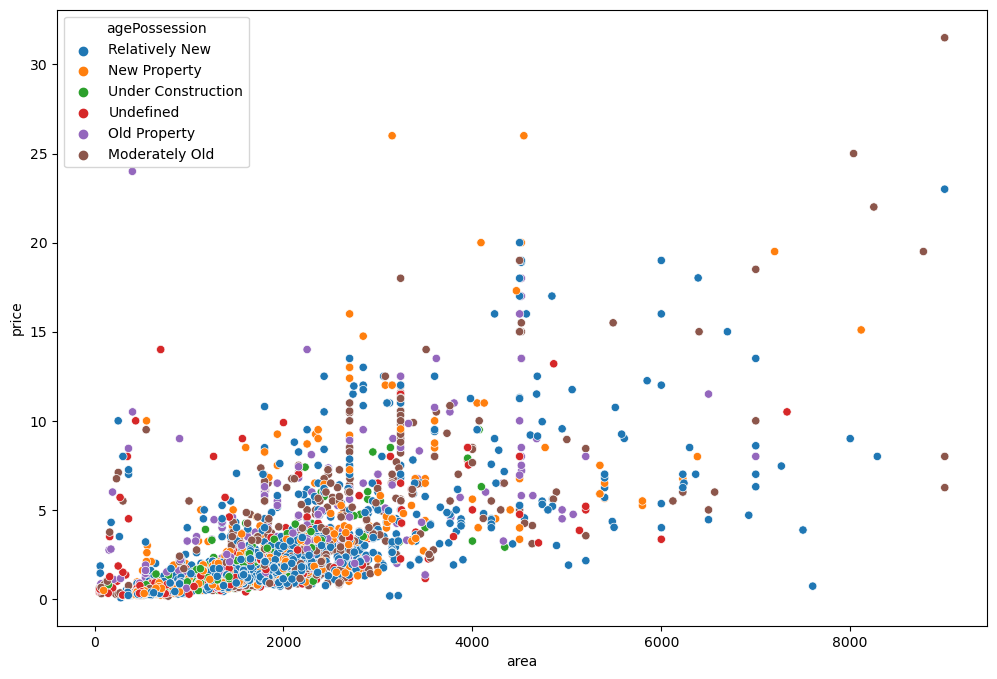

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(df[df['area']<10000]['area'],df['price'],hue=df['agePossession'])

C:\Users\Lenovo\AppData\Local\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area', ylabel='price'>

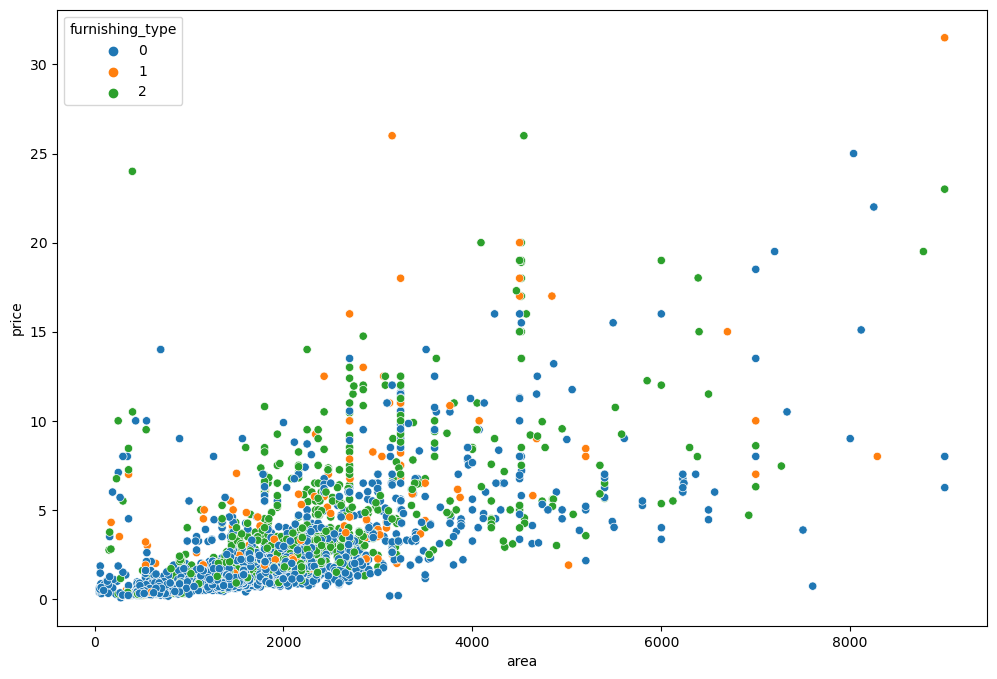

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(df[df['area']<10000]['area'],df['price'],hue=df['furnishing_type'].astype('category'))

<AxesSubplot:xlabel='bedRoom', ylabel='price'>

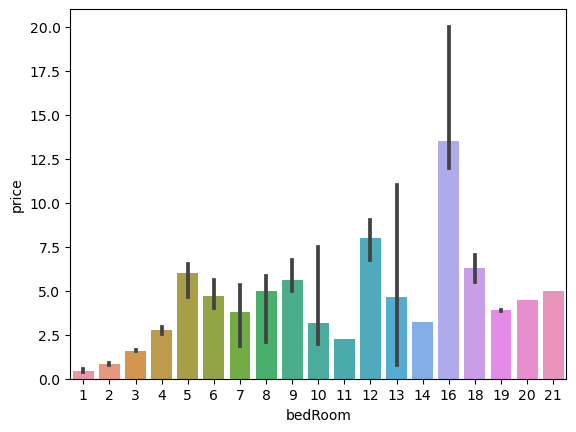

In [38]:
sns.barplot(x=df['bedRoom'],y=df['price'],estimator=np.median)

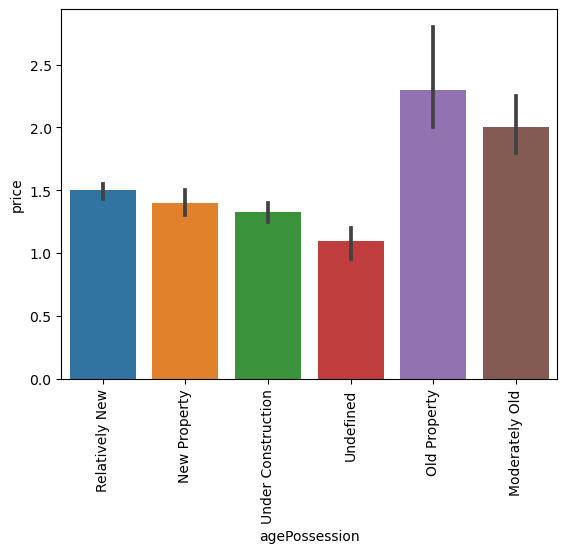

In [39]:
sns.barplot(x=df['agePossession'],y=df['price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

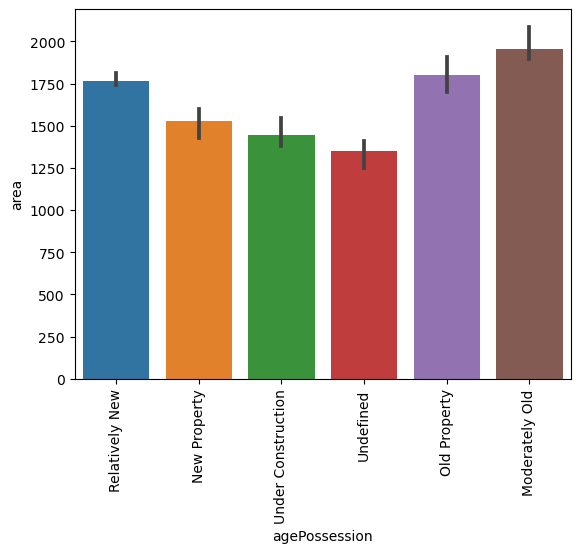

In [40]:
sns.barplot(x=df['agePossession'],y=df['area'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()